# Lab 5: Deep learning based end-to-end speech recognition 

The goal of this assignment is to get familiar with applications that require speech data as input.

We would be using the torchaudio library (pip install torchaudio==0.11.0), please carefull read this tutorial https://pytorch.org/tutorials/intermediate/speech_recognition_pipeline_tutorial.html

Next, we would ask you to perform similar analysis on a speech dataset, i.e., speechdata.zip. Unzip this folder, you would see a folder named wavs, and a file called "labels.csv", containing annotated transcripts, including the files in the wavs folder (you have more labels in labels.csv). This dataset is selected from https://keithito.com/LJ-Speech-Dataset/, a famous speech-based application benchmark.

General torchaudio tutorials: https://pytorch.org/tutorials/index.html

**Submission: submit via onq.** 


In [ ]:
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import needed libraries. 
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd
import glob
import jiwer
import fnmatch
!pip install python_speech_features
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import torch
import torchaudio
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Task 1: Basic data exploration
Select one randomly sampled wav file in the given folder, perform the following analysis:

1) Print the shape of the picked waveform

2) Print the sample rate of the waveform. 

3) Visualize the waveform using matplotlib

4) Create the spectrogram representation of the picked waveform and visualize it. 

5) Create the MFCC representation of the picked waveform and visualize it.

Reference: https://www.kaggle.com/code/davids1992/speech-representation-and-data-exploration/notebook 

In [ ]:
# TODO code for task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# TODO code for task 1

SPEECH_FILE_path = '/content/drive/MyDrive/wavs/'

SPEECH_FILE = 'LJ001-0040.wav'

waveform, sample_rate=torchaudio.load(SPEECH_FILE_path +SPEECH_FILE)

print("Shape of waveform: ", waveform.size())
print("Sample rate of waveform: ", sample_rate)

Shape of waveform:  torch.Size([1, 167325])
Sample rate of waveform:  22050


In [ ]:
#Listening to a sample of the records

ipd.Audio(SPEECH_FILE_path +SPEECH_FILE)

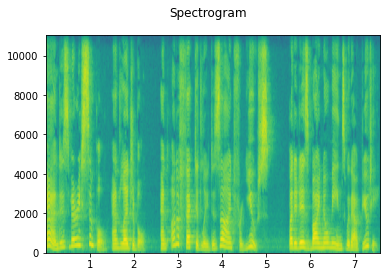

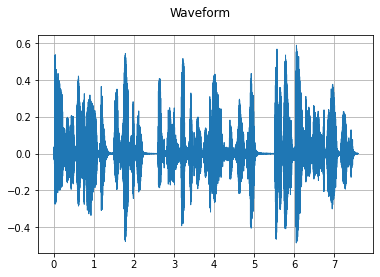

In [ ]:
waveform = waveform.numpy()
channels, num_frames = waveform.shape
time_axis = torch.arange(0, num_frames) / sample_rate
figure, axes = plt.subplots(channels, 1)
if channels == 1:
  axes = [axes]
for j in range(channels):
  axes[j].specgram(waveform[j], Fs=sample_rate)
  if channels > 1:
    axes[j].set_ylabel(f'Channel {j+1}')
figure.suptitle("Spectrogram")
plt.show()


if channels == 1:
  axes = [axes]
for i in range(channels):
  axes[i].plot(time_axis, waveform[i], linewidth=1)
  axes[i].grid(True)
  if channels > 1:
    axes[i].set_ylabel(f'Channel {i+1}')
figure.suptitle('Waveform')
plt.show()

## Task 2: Creating a Wav2Vec2 model that can perform feature extraction and classification.


In [ ]:
# TODO code for task 2


In [ ]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
print("Sample Rate: ", bundle.sample_rate)
model = bundle.get_model()
labels=bundle.get_labels()
print(labels)
waveform= torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
emissions, _ =model(waveform)

Sample Rate:  16000
('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [ ]:
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """Given a sequence emission over labels, get the best path string
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          str: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        return "".join([self.labels[i] for i in indices])

In [ ]:
decoder = GreedyCTCDecoder(labels=bundle.get_labels())
transcript = decoder(emissions[0])

In [ ]:
print(transcript)
ipd.Audio(SPEECH_FILE_path+SPEECH_FILE)

WAS|THESE|GREAT|VENETIAN|PRINTERS|TOGETHER|WITH|THEIR|BROTHREN|OF|ROME|MILAN|


## Task 3: Extract acoustic features and generate predicted transcript for each waveform in the given dataset

In [ ]:
# TODO code for task 3


In [ ]:
li=[]
for i in os.listdir(SPEECH_FILE_path):
    if fnmatch.fnmatch(i, '*.wav'):
      waveform, sample_rate=torchaudio.load(SPEECH_FILE_path+file)
      waveform= torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
      emissions, _ =model(waveform)
      coder = GreedyCTCDecoder(labels=bundle.get_labels())
      trans = coder(emissions[0])
      li.append(trans)
      print(trans)


AFTER|HIS|DEATH|IN|THE|FOURTEEN|EIGHTIES|OR|AT|LEAST|BY|FOURTEEN|NINETY|PRINTING|IN|VENICE|HAD|DECLINED|VERY|MUCH|
AND|ARE|WORTHY|REPRESENTATIVES|OF|THE|EAGER|ENTHUSIASM|FOR|THE|REVIVED|LEARNING|OF|THAT|EPOCH|BY|FAR|
THE|BEST|MOSTLY|FRENCH|OR|LOW|COUNTRY|WAS|NEAT|AND|CLEAR|BUT|WITHOUT|ANY|DISTINCTION|
IN|THE|LOW|COUNTRIES|AND|COLOGNE|WHICH|WERE|VERY|FERTILE|OF|PRINTED|BOOKS|GATHICK|WAS|THE|FAVORITE|
WERE|THE|LEADERS|IN|THIS|LUCKLESS|CHANGE|THOUGH|OUR|OWN|BASKERVILLE|WHO|WAS|AT|WORK|SOME|YEARS|BEFORE|THEM|WENT|MUCH|ON|THE|SAME|LINES|
IT|MUST|BE|REMEMBERED|HOWEVER|THAT|MOST|MODERN|PRINTING|IS|DONE|BY|MACHINERY|ON|SOFT|PAPER|AND|NOT|BY|THE|HAND|PRESS|
MANY|OF|WHOSE|TYPES|INDEED|LIKE|THAT|OF|THE|SOUBIACO|WORKS|ARE|OF|A|TRANSITIONAL|CHARACTER|
IN|FACT|GUNTHER|ZINER'S|FIRST|TYPE|AFTERWARDS|USED|BY|SCHUSLER|IS|REMARKABLY|LIKE|THE|TYPE|OF|THE|BEFORE|MENTIONED|SUBIACO|BOOKS|
WENT|ON|APACE|AND|BY|THE|END|OF|THE|SIXTEENTH|CENTURY|THERE|WAS|NO|REALLY|BEAUTIFUL|PRINTING|DONE|
THE|ROMAN|LETTER|WAS|U

In [ ]:
len(li)

100

## Task 4: evaluate the performance of the trained model on the testing dataset using Word Error Rate (WER), Match Error Rate (MER)

Hint: consider this package, https://pypi.org/project/jiwer/

In [ ]:
# TODO code for task 4


In [ ]:
labels=pd.read_csv('labels.csv',header=None,engine='python', error_bad_lines=False)
labels.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



Skipping line 317: unexpected end of data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,LJ001-0001|Printing,in the only sense with which we are at presen...,differs from most if not from all the arts an...,in the only sense with which we are at presen...,differs from most if not from all the arts an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LJ001-0002|in being comparatively modern.|in b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LJ001-0003|For although the Chinese took impre...,by a similar process|For although the Chinese...,by a similar process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LJ001-0004|produced the block books,which were the immediate predecessors of the ...,|produced the block books,which were the immediate predecessors of the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LJ001-0005|the invention of movable metal lett...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
SPEECH_FILE=[]
for i in os.listdir(SPEECH_FILE_path):
    if fnmatch.fnmatch(i, '*.wav'):
      SPEECH_FILE.append(i)

len(SPEECH_FILE)

100

In [ ]:
df=pd.DataFrame()
num=0
for i in range (len(list(labels.loc[:,0]))):
  name=labels.iloc[i,0].split('|')[0]
  if name+".wav" in SPEECH_FILE:
    num+=1
    df=df.append(labels.iloc[i])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,LJ001-0001|Printing,in the only sense with which we are at presen...,differs from most if not from all the arts an...,in the only sense with which we are at presen...,differs from most if not from all the arts an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LJ001-0002|in being comparatively modern.|in b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LJ001-0003|For although the Chinese took impre...,by a similar process|For although the Chinese...,by a similar process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LJ001-0004|produced the block books,which were the immediate predecessors of the ...,|produced the block books,which were the immediate predecessors of the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LJ001-0005|the invention of movable metal lett...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,LJ001-0096|have now come into general use and ...,which is in fact the Bodoni type|have now com...,which is in fact the Bodoni type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,LJ001-0097|a little reduced in ugliness. The d...,|a little reduced in ugliness. The design of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,LJ001-0098|and the whole effect is a little to...,owing to the thinness of the letters.|and the...,owing to the thinness of the letters.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,LJ001-0099|It must be remembered,however,that most modern printing is done by machiner...,and not by the hand press,|It must be remembered,however,that most modern printing is done by machiner...,and not by the hand press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final=pd.DataFrame({
    'name':SPEECH_FILE, 
    'truth':"",
    'predict':li
})

In [ ]:
num=0
def script(filename=''):
  for i in range (df.shape[0]):
    if name==df.iloc[i,0].split('|')[0]:
      script=""
      for j in range (df.shape[1]):
        if pd.isna(df.iloc[i,j])!=True:
          placeholder=df.iloc[i,j]
          script+=placeholder
      script=script.split("|")[1]
    else:
      pass

  return script
for i in range (len(list(df.loc[:,0]))):
  name=df.loc[i,0].split('|')[0]
  if name+".wav" in list(df_final['name']):
    num+=1
    df_final.loc[df_final['name']==name+".wav",'truth']=script(filename=name+".wav")

df_final

,name,truth,predict
0,LJ001-0049.wav,,AFTER|HIS|DEATH|IN|THE|FOURTEEN|EIGHTIES|OR|AT...
1,LJ001-0058.wav,and are worthy representatives of the eager en...,AND|ARE|WORTHY|REPRESENTATIVES|OF|THE|EAGER|EN...
2,LJ001-0074.wav,the best mostly French or Low-Country was neat...,THE|BEST|MOSTLY|FRENCH|OR|LOW|COUNTRY|WAS|NEAT...
3,LJ001-0067.wav,In the Low Countries and Cologne which were ve...,IN|THE|LOW|COUNTRIES|AND|COLOGNE|WHICH|WERE|VE...
4,LJ001-0088.wav,were the leaders in this luckless change thoug...,WERE|THE|LEADERS|IN|THIS|LUCKLESS|CHANGE|THOUG...
...,...,...,...
95,LJ001-0045.wav,,FOURTEEN|SIXTY|NINE|FOURTEEN|SEVENTY|
96,LJ001-0044.wav,,JOHN|OF|SPIRES|AND|HIS|BROTHER|VINDOLYN|FOLLOW...
97,LJ001-0069.wav,This type was introduced into England by Wynky...,THIS|TYPE|WAS|INTRODUCED|INTO|ENGLAND|BY|WINKE...
98,LJ001-0087.wav,for the seventeenth-century letters are at lea...,FOR|THE|SEVENTEENTH|CENTURY|LETTERS|ARE|AT|LEA...


In [ ]:
df_new=df_final[df_final['truth']!=""]
df_new

,name,truth,predict
1,LJ001-0058.wav,and are worthy representatives of the eager en...,AND|ARE|WORTHY|REPRESENTATIVES|OF|THE|EAGER|EN...
2,LJ001-0074.wav,the best mostly French or Low-Country was neat...,THE|BEST|MOSTLY|FRENCH|OR|LOW|COUNTRY|WAS|NEAT...
3,LJ001-0067.wav,In the Low Countries and Cologne which were ve...,IN|THE|LOW|COUNTRIES|AND|COLOGNE|WHICH|WERE|VE...
4,LJ001-0088.wav,were the leaders in this luckless change thoug...,WERE|THE|LEADERS|IN|THIS|LUCKLESS|CHANGE|THOUG...
5,LJ001-0099.wav,It must be remembered however that most modern...,IT|MUST|BE|REMEMBERED|HOWEVER|THAT|MOST|MODERN...
...,...,...,...
93,LJ001-0053.wav,they must be considered to have ended the age ...,THEY|MUST|BE|CONSIDERED|TO|HAVE|ENDED|THE|AGE|...
94,LJ001-0093.wav,This experiment was so far successful that abo...,THIS|EXPERIMENT|WAS|SO|FAR|SUCCESSFUL|THAT|ABO...
97,LJ001-0069.wav,This type was introduced into England by Wynky...,THIS|TYPE|WAS|INTRODUCED|INTO|ENGLAND|BY|WINKE...
98,LJ001-0087.wav,for the seventeenth-century letters are at lea...,FOR|THE|SEVENTEENTH|CENTURY|LETTERS|ARE|AT|LEA...


In [ ]:
df_new.reset_index(inplace=True,drop=True)
df_new

,name,truth,predict
0,LJ001-0058.wav,and are worthy representatives of the eager en...,AND|ARE|WORTHY|REPRESENTATIVES|OF|THE|EAGER|EN...
1,LJ001-0074.wav,the best mostly French or Low-Country was neat...,THE|BEST|MOSTLY|FRENCH|OR|LOW|COUNTRY|WAS|NEAT...
2,LJ001-0067.wav,In the Low Countries and Cologne which were ve...,IN|THE|LOW|COUNTRIES|AND|COLOGNE|WHICH|WERE|VE...
3,LJ001-0088.wav,were the leaders in this luckless change thoug...,WERE|THE|LEADERS|IN|THIS|LUCKLESS|CHANGE|THOUG...
4,LJ001-0099.wav,It must be remembered however that most modern...,IT|MUST|BE|REMEMBERED|HOWEVER|THAT|MOST|MODERN...
...,...,...,...
66,LJ001-0053.wav,they must be considered to have ended the age ...,THEY|MUST|BE|CONSIDERED|TO|HAVE|ENDED|THE|AGE|...
67,LJ001-0093.wav,This experiment was so far successful that abo...,THIS|EXPERIMENT|WAS|SO|FAR|SUCCESSFUL|THAT|ABO...
68,LJ001-0069.wav,This type was introduced into England by Wynky...,THIS|TYPE|WAS|INTRODUCED|INTO|ENGLAND|BY|WINKE...
69,LJ001-0087.wav,for the seventeenth-century letters are at lea...,FOR|THE|SEVENTEENTH|CENTURY|LETTERS|ARE|AT|LEA...


In [ ]:
transformation_truth = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.ReduceToListOfListOfWords(word_delimiter=" ")
]) 
transformation_gr = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.ReduceToListOfListOfWords(word_delimiter="|")
]) 

for i in range (len(df_new)):
  filename=df_new.loc[i,'name']
  ground_truth=df_new.loc[i,'truth']
  hypothesis=df_new.loc[i,'predict']
  df_new.loc[i,'wer']=jiwer.wer(
      ground_truth, 
      hypothesis, 
      truth_transform=transformation_truth, 
      hypothesis_transform=transformation_gr
  )
  df_new.loc[i,'mer']=jiwer.mer(
    ground_truth, 
    hypothesis, 
    truth_transform=transformation_truth, 
    hypothesis_transform=transformation_gr
  )
df_new 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,truth,predict,WER,MER
0,LJ001-0058.wav,and are worthy representatives of the eager en...,AND|ARE|WORTHY|REPRESENTATIVES|OF|THE|EAGER|EN...,0.058824,0.058824
1,LJ001-0074.wav,the best mostly French or Low-Country was neat...,THE|BEST|MOSTLY|FRENCH|OR|LOW|COUNTRY|WAS|NEAT...,0.214286,0.200000
2,LJ001-0067.wav,In the Low Countries and Cologne which were ve...,IN|THE|LOW|COUNTRIES|AND|COLOGNE|WHICH|WERE|VE...,0.117647,0.117647
3,LJ001-0088.wav,were the leaders in this luckless change thoug...,WERE|THE|LEADERS|IN|THIS|LUCKLESS|CHANGE|THOUG...,0.040000,0.040000
4,LJ001-0099.wav,It must be remembered however that most modern...,IT|MUST|BE|REMEMBERED|HOWEVER|THAT|MOST|MODERN...,0.000000,0.000000
...,...,...,...,...,...
66,LJ001-0053.wav,they must be considered to have ended the age ...,THEY|MUST|BE|CONSIDERED|TO|HAVE|ENDED|THE|AGE|...,0.071429,0.071429
67,LJ001-0093.wav,This experiment was so far successful that abo...,THIS|EXPERIMENT|WAS|SO|FAR|SUCCESSFUL|THAT|ABO...,0.200000,0.187500
68,LJ001-0069.wav,This type was introduced into England by Wynky...,THIS|TYPE|WAS|INTRODUCED|INTO|ENGLAND|BY|WINKE...,0.166667,0.166667
69,LJ001-0087.wav,for the seventeenth-century letters are at lea...,FOR|THE|SEVENTEENTH|CENTURY|LETTERS|ARE|AT|LEA...,0.263158,0.250000


## Task 5: check files with the worst performance and perform a simple error analysis, e.g., what are the files having worser performance, and what are the potential reasons, do they share any common patterns?


In [ ]:
# TODO code for task 5


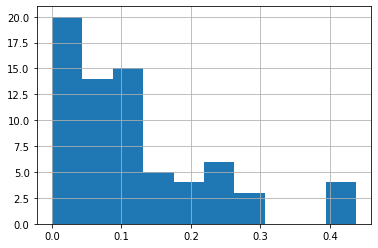

In [ ]:
df_new['wer'].hist();


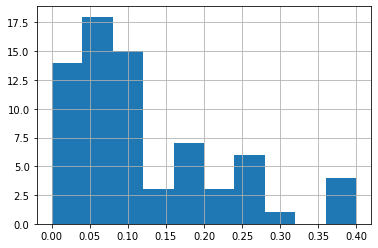

In [ ]:
df_new['mer'].hist();

In [ ]:
df_new['wer'].max()

0.4375

In [ ]:
df_new['mer'].max()

0.4

In [ ]:
df_new[df_new['wer']>=0.2]

,file_name,ground,predicted,MER,WER
23,LJ001-0007.wav,the earliest book printed with movable types t...,THE|EARLIEST|BOOK|PRINTED|WITH|MOVABLE|TYPES|T...,0.368421,0.437500
29,LJ001-0092.wav,The Chiswick press in 1844 revived Caslon's fo...,THE|CHISWICK|PRESS|IN|EIGHTEEN|FORTY|FOUR|REVI...,0.368421,0.411765
39,LJ001-0055.wav,some of which -- as e.g. that of Jacobus Rubeu...,SOME|OF|WHICH|AS|E|G|THAT|OF|JACOBIS|RUBIUS|OR...,0.400000,0.400000
58,LJ001-0081.wav,type cast from his matrices is still in everyd...,TYPE|CAST|FROM|HIS|MATRESSES|IS|STILL|IN|EVERY...,0.363636,0.400000
